# Twitter Sentimental Analysis


The initial steps for data analysis in Python include:

1. **Data Acquisition:** This dataset is downloaded from this link : https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model/notebook
 
2. **Loading the Data:** The Data is in .csv format.

3. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

4. **Data Cleaning:** It's crucial to check the available data and perform tasks such as removing empty columns, standardizing terms, imputing missing data where appropriate, and more.

5. After cleaning, you should conduct a more in-depth exploratory data analysis to further understand the data.

## Add necessary Libraries to the project

In [1]:
from function import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

## Loading the Dataset

We have adataset of tweets and we want to figure out if a tweet is : "Negative", "Positive", "Neutral"

First we upload the Dataset:

In [3]:
primary_data = pd.read_csv("Data/sentimental_data.csv")

In [4]:
primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",neutral
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,088c60f138,my boss is bullying me...,negative
3,3,9642c003ef,what interview! leave me alone,negative
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
primary_data.shape

(31015, 4)

So We have 31015 tweets in the dataset

## First EDA - Before Cleaning the Data

In [6]:
primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",neutral
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,088c60f138,my boss is bullying me...,negative
3,3,9642c003ef,what interview! leave me alone,negative
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [7]:
primary_data.describe()

,Unnamed: 0
count,31015.000000
mean,12375.681154
std,8387.965355
min,0.000000
25%,4219.500000
50%,11973.000000
75%,19726.500000
max,27480.000000


### Univariate analysis of 'sentiment' column:

Lets look at the distribution of tweets in the dataset

In [8]:
temp = primary_data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,12547
2,positive,9685
0,negative,8782


In [9]:
# Calculating the proportions for each value in 'temp' and rounding the results to two decimal places
(temp['text']/temp['text'].sum()).round(2)

1    0.40
2    0.31
0    0.28
Name: text, dtype: float64

Text(0.5, 1.0, 'Sentiment Distribution in Primary Data')

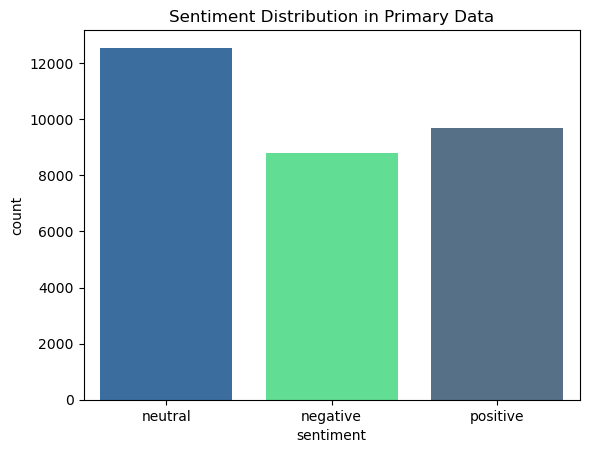

In [10]:
# plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=primary_data, palette=random_colours(3))

# Add a title
plt.title('Sentiment Distribution in Primary Data')

**Insights** for 'sentiment':

- The most common sentiment classification is 'neutral', comprising approximately 40% of the properties in the dataset.
- The second most frequent sentiment classification is 'positive' making up roughly 31%.

### One hot Encodding

We first (again) find out how many category do we have in "sentiment" column:

In [11]:
primary_data['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

Now we change them to numerical values:

- **Negative : 0**
- **Neutral : 1**
- **Positive : 2**

In [12]:
primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",neutral
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,088c60f138,my boss is bullying me...,negative
3,3,9642c003ef,what interview! leave me alone,negative
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [13]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
primary_data['sentiment'] = label_encoder.fit_transform(primary_data['sentiment'])

primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",1
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0
2,2,088c60f138,my boss is bullying me...,0
3,3,9642c003ef,what interview! leave me alone,0
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0


## Cleaning the dataset

### Remove Not important Columns
Remove "Unnamed:0" column

In [14]:
primary_data.drop(columns=["Unnamed: 0"], inplace=True)
primary_data.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0
2,088c60f138,my boss is bullying me...,0
3,9642c003ef,what interview! leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0


### Remove NA Values

In [15]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     31015 non-null  object
 1   text       31014 non-null  object
 2   sentiment  31015 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.0+ KB


In [16]:
primary_data.isna().sum()

textID       0
text         1
sentiment    0
dtype: int64

We have one null Value in the dataset, we will just remove it

In [17]:
primary_data.dropna(axis = 0, how ='any',inplace=True) 

In [18]:
primary_data.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

We have no more NA value

### Remove punctutations
There are some Uppercase, lowercase, punctutation in text. so we are going to clean them. What is "clean_text_syntax" exactly doing?

- Make text lowercase
- remove text in square brackets
- remove links
- remove punctuation
- remove words containing numbers

In [19]:
primary_data['text'] = primary_data['text'].apply(str).apply(lambda x: text_preprocessing(x))
primary_data.head()

,textID,text,sentiment
0,cb774db0d1,id have responded if i were going,1
1,549e992a42,sooo sad i will miss you here in san diego,0
2,088c60f138,my boss is bullying me,0
3,9642c003ef,what interview leave me alone,0
4,358bd9e861,sons of why couldnt they put them on the relea...,0


In [20]:
primary_data['text_char_count'] = primary_data['text'].astype(str).apply(len)
primary_data['text_word_count'] = primary_data['text'].apply(lambda x: len(str(x).split()))
primary_data.head()

,textID,text,sentiment,text_char_count,text_word_count
0,cb774db0d1,id have responded if i were going,1,33,7
1,549e992a42,sooo sad i will miss you here in san diego,0,42,10
2,088c60f138,my boss is bullying me,0,22,5
3,9642c003ef,what interview leave me alone,0,29,5
4,358bd9e861,sons of why couldnt they put them on the relea...,0,67,13


## Second EDA - After Cleaning the Data

### Univariate Analysis of numerical columns

In [21]:
# Summary statistics for the dataset
primary_data.describe()

,sentiment,text_char_count,text_word_count
count,31014.000000,31014.000000,31014.000000
mean,1.029116,61.969691,12.439672
std,0.771111,33.396842,6.736474
min,0.000000,0.000000,0.000000
25%,0.000000,34.000000,7.000000
50%,1.000000,57.000000,12.000000
75%,2.000000,88.000000,18.000000
max,2.000000,137.000000,32.000000


**Insights** from Summary Statistics for 'primary_data':

- The average (mean) number of words in each text in the dataset is approximately `12`.

- The average (mean) number of characters in each text in the dataset is approximately `61`.

- The median number of words in each text (middle value when sorted) stands at `12`. The median is equal the mean, suggesting no skew in the distribution of number of words in each text.

- The standard deviation, a measure of the amount of variation or dispersion in the number of words in each text, is approximately `6`. This indicates that sale prices can vary significantly from the average.

- The minimum and maximum number of words in each text are `0` and `32`, respectively, highlighting a wide range of property values in the dataset.

- The interquartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `7` and `18`. This means that 50% of the number of words in each text in the dataset are within this price range.

### Histograms

/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_65551/3382048974.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(primary_data['text_word_count'], kde=True, bins=30, palette=random_colours(1))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of words in each text Distribution in Primary Data')

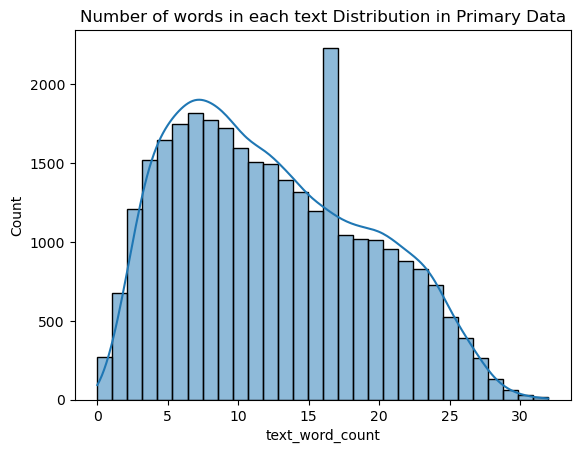

In [22]:
# Plotting a histogram for the 'text_word_count' column of the 'primary_data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(primary_data['text_word_count'], kde=True, bins=30, palette=random_colours(1))

# Add a title
plt.title('Number of words in each text Distribution in Primary Data')

**Insights:**
- The histogram reveals that the majority of the word Number are in the range of approximately `5` to `10`. However, there's a long tail on the right side.

If we wanted to plot at the same time all the numerical variables with histograms, without a for loop, we could do so using matplotlib:

array([[<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'text_char_count'}>],
       [<Axes: title={'center': 'text_word_count'}>, <Axes: >]],
      dtype=object)

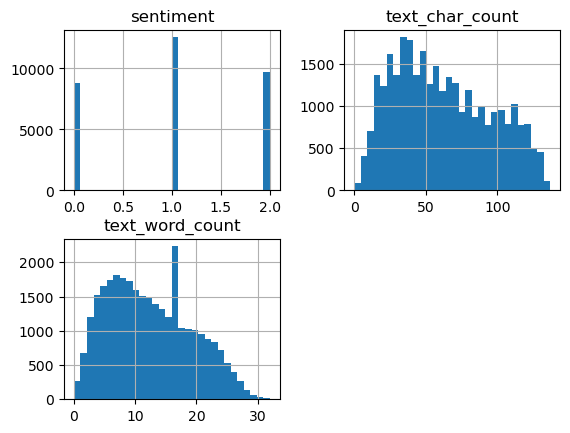

In [23]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = primary_data.select_dtypes("number")

# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(bins=30, xlabelsize=10, ylabelsize=10)

Now we want to plot a word cloud:

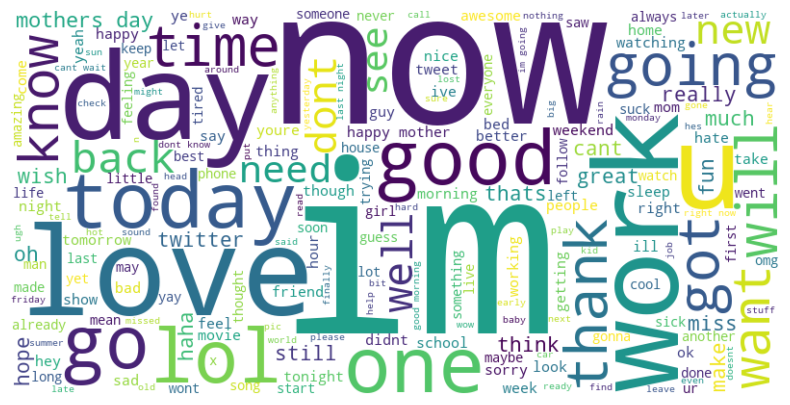

In [102]:
from wordcloud import WordCloud


# Combine all the text into one string
text = " ".join(primary_data['text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Split Data into Train and Test

First we need to distinguish from features and target

In [24]:
# features = primary_data.drop(columns = ["sentiment"])
features = primary_data["text"]
target = primary_data["sentiment"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [26]:
X_train.head()

15312    going to get some strawberries for the champag...
14569                      just watched jonas it was funny
13452    just days left for the offf in oeiras portugal...
4966     castlebar doesnt have so im going to galway to...
25520               off to friendss for theree birthdayy x
Name: text, dtype: object

In [27]:
y_train.head()

15312    1
14569    2
13452    1
4966     1
25520    1
Name: sentiment, dtype: int64

## Check the Balance of Train Data

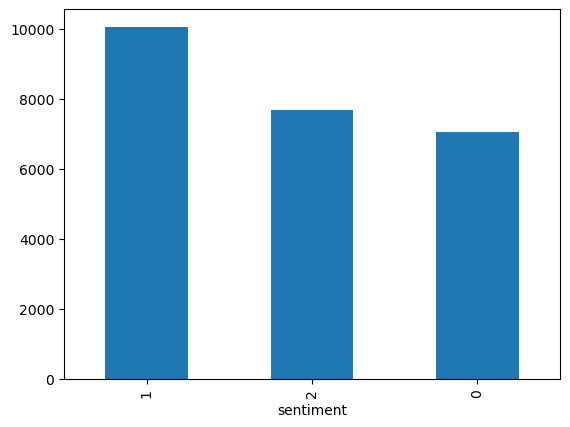

In [28]:
survived = y_train.value_counts()
survived.plot(kind="bar")
plt.show()

The dataset is not extremely imbalanced, but there is some imbalance, particularly with the "neutral" sentiment having a higher count than "positive" and "negative."

So I decided to continue without **Oversmapling** and then for improving the models perforamnce check wether **Oversampling** can help improving the accuracy or not.

## Machine Learning Models

#### Vectorize the text data

- The 'CountVectorizer' converts text data into a numerical matrix based on word counts (excluding stopwords).
- 'fit_transform' learns the vocabulary and transforms the training data.
- 'transform' converts the test data using the learned vocabulary.
This process prepares the text data for machine learning models, which typically require numerical input.

<div class="alert alert-block alert-info">
<b>Code sample:</b> 

``` python
X_train = ["I love programming", "Python is great", "I love Python"]

X_test = ["Programming in Python", "I love coding"]

'CountVectorizer' output:
['great', 'love', 'programming', 'python']

'transform' and 'fit_transform' Output:

[[0 1 1 0]  # "I love programming" -> ['great', 'love', 'programming', 'python']

[1 0 0 1]  # "Python is great" -> ['great', 'love', 'programming', 'python']

[0 1 0 1]] # "I love Python" -> ['great', 'love', 'programming', 'python']
``` 

</div>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

***

### 1. Naive Bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test_vect)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6556504916975657
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62      1727
           1       0.59      0.69      0.64      2487
           2       0.73      0.69      0.71      1989

    accuracy                           0.66      6203
   macro avg       0.67      0.65      0.66      6203
weighted avg       0.66      0.66      0.66      6203



find training accuracy:

In [65]:
# Predict on the training data
y_train_pred_nb = nb_model.predict(X_train_vect)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_nb)

# Print the training accuracy
print("Naive Bayes Training Accuracy:", training_accuracy)

Naive Bayes Training Accuracy: 0.8401918503889404


<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of in Naive Bayes Model is : 66 %
</div>

**Tuning the hyperparameters with GridSearch**

In [31]:
best_hyperparametered_model = find_best_hyperparametered_model("Naive_Bayes", MultinomialNB(), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nNaive Bayes Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Parameter tuning Started ...
Best Parameters: {'alpha': 5.0}
Best Score: 0.6492280765613951
Naive Bayes Parameter tuning Finished.

Naive Bayes Accuracy After Parameter Tuning: 0.6533935192648719


#### Cross validation :

<div class="alert alert-block alert-info">
<b>Cross-Validation:</b> 
Adding cross-validation to the machine learning models helps ensure that the models are not overfitting to a single train-test split and that they generalize well to unseen data. So we add it to the models. If your model performs well on all folds during cross-validation, it's likely not overfitting.
</div>

So this following code run **Naive Bayes Model** with cross validation.

In [32]:
from sklearn.model_selection import cross_val_score

# Instantiate the model
nb_model = MultinomialNB()

X_vect = vectorizer.fit_transform(features)

# Perform cross-validation
nb_cv_scores = cross_val_score(nb_model, X_vect, target, cv=5)

# Print the results
print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Naive Bayes Mean Accuracy:", nb_cv_scores.mean())


Naive Bayes Cross-Validation Scores: [0.64339836 0.64646139 0.64742866 0.64549412 0.65043534]
Naive Bayes Mean Accuracy: 0.6466435736044958


***

### 2. Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_vect)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6867644688054168
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64      1727
           1       0.63      0.74      0.68      2487
           2       0.78      0.70      0.74      1989

    accuracy                           0.69      6203
   macro avg       0.70      0.68      0.69      6203
weighted avg       0.69      0.69      0.69      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of Logistic Regression Model is : 69 %
</div>

Find Training Accuracy:

In [67]:
# Predict on the training data
y_train_pred_nb = lr_model.predict(X_train_vect)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_nb)

# Print the training accuracy
print("Logistic Regression Training Accuracy:", training_accuracy)

Logistic Regression Training Accuracy: 0.8972230059247914


**Tuning the hyperparameters with Randomized Search**

In [34]:
# best_hyperparametered_model = find_best_hyperparametered_model("Logistic", LogisticRegression(max_iter=1000), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nLogistic Regression Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))


Logistic Regression Accuracy After Parameter Tuning: 0.6533935192648719


***

### 3. SVM

In [68]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_vect)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6940190230533613
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.63      1727
           1       0.62      0.80      0.70      2487
           2       0.79      0.70      0.74      1989

    accuracy                           0.69      6203
   macro avg       0.72      0.68      0.69      6203
weighted avg       0.71      0.69      0.69      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of SVM Model is : 69 %
</div>

Find Training Accuracy:

In [69]:
# Predict on the training data
y_train_pred_nb = svm_model.predict(X_train_vect)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_nb)

# Print the training accuracy
print("SVM Training Accuracy:", training_accuracy)

SVM Training Accuracy: 0.8953689895610818


**Tuning the hyperparameters with Randomized Search**

In [36]:
# best_hyperparametered_model = find_best_hyperparametered_model("SVM", SVC(), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nSVM Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))


SVM Accuracy After Parameter Tuning: 0.6533935192648719


***

### 4. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_vect)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.6840238594228599
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64      1727
           1       0.63      0.71      0.67      2487
           2       0.75      0.73      0.74      1989

    accuracy                           0.68      6203
   macro avg       0.69      0.68      0.68      6203
weighted avg       0.69      0.68      0.68      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of Random Forest Model is : 68 %
</div>

Find Training Accuracy:

In [72]:
# Predict on the training data
y_train_pred_nb = rf_model.predict(X_train_vect)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_nb)

# Print the training accuracy
print("Random Forest Training Accuracy:", training_accuracy)

Random Forest Training Accuracy: 0.9960904437547862


**Tuning the hyperparameters with GridSearch**

In [38]:
# best_hyperparametered_model = find_best_hyperparametered_model("RandomForest", RandomForestClassifier(random_state=42), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nSVM Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))


SVM Accuracy After Parameter Tuning: 0.6533935192648719


***

### 5. XGBoost
**Gradient Boosting Machines (GBMs)**

**Overview:** Gradient Boosting is an ensemble technique that builds models sequentially, each new model attempting to correct errors made by the previous models. It often outperforms Random Forests and other basic models.
Popular Implementations:
- XGBoost: Known for its speed and performance.
- LightGBM: Efficient and scalable, particularly good for large datasets.
- CatBoost: Handles categorical features natively and is easy to use.


In [73]:
import xgboost as xgb

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train_vect, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_vect)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/Users/Erfan/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[15:34:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.6893438658713525
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.51      0.62      1727
           1       0.61      0.81      0.69      2487
           2       0.78      0.69      0.74      1989

    accuracy                           0.69      6203
   macro avg       0.72      0.67      0.68      6203
weighted avg       0.71      0.69      0.69      6203



<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of XGBoost Model is : 69 %
</div>

Find Training Accuracy:

In [74]:
# Predict on the training data
y_train_pred_nb = xgb_model.predict(X_train_vect)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_nb)

# Print the training accuracy
print("XGBoost Training Accuracy:", training_accuracy)

XGBoost Training Accuracy: 0.7203659667083149


**Tuning the hyperparameters with GridSearch**

In [40]:
# best_hyperparametered_model = find_best_hyperparametered_model("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), X_train_vect, y_train)

# Predict on the test data
y_pred_nb = best_hyperparametered_model.predict(X_test_vect)

# Evaluate the model
print("\nXGBoost Accuracy After Parameter Tuning:", accuracy_score(y_test, y_pred_nb))


XGBoost Accuracy After Parameter Tuning: 0.6533935192648719


***

### 6. Deep Learning Models (Neural Networks)

**Overview:** Neural networks, especially deep learning models like Recurrent Neural Networks (RNNs), Convolutional Neural Networks (CNNs), and Transformers, are state-of-the-art for text classification tasks. These models can capture complex patterns in text data.
Popular Architectures:
- LSTM/GRU: Variants of RNNs that are effective in handling sequential data.
- CNN for Text: Convolutional layers applied to text data for extracting local patterns.
- Transformers (BERT, RoBERTa, GPT): Attention-based models that have become the standard for many NLP tasks.

**Example using a simple LSTM with Keras:**

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert the text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform input length
max_length = 100  # You can adjust this based on your data
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Assuming y_train and y_test are the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format if it's a multi-class classification
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded, num_classes=3)
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded, num_classes=3)




This code implements a sequence classification model using Bidirectional LSTM layers. The model is designed for tasks like text classification, where the goal is to classify input sequences (e.g., sentences) into one of several classes.

#### Model Architecture

1. **Embedding Layer**:
   - **Purpose**: Converts each word (represented as an integer index) in the input sequences into dense vectors of fixed size (called embeddings).
   - **Parameters**:
     - `input_dim=5000`: The size of the vocabulary, i.e., the number of unique words that the model can recognize.
     - `output_dim=128`: The size of the embedding vectors. Each word is mapped to a 128-dimensional vector.
     - `input_length=max_length`: The maximum length of the input sequences. Each sequence will be padded or truncated to this length.

2. **SpatialDropout1D Layer**:
   - **Purpose**: Regularizes the model by randomly setting entire 1D feature maps (i.e., individual embedding dimensions) to zero. This helps prevent overfitting.
   - **Parameter**:
     - `rate=0.2`: The fraction of the input units to drop.

3. **Bidirectional LSTM Layers**:
   - **Purpose**: Processes the input sequences in both forward and backward directions, allowing the model to capture dependencies from both past and future contexts.
   - **First Bidirectional LSTM Layer**:
     - `LSTM(128, return_sequences=True)`: Outputs a sequence of hidden states for each time step, which is then passed to the next layer.
   - **Second Bidirectional LSTM Layer**:
     - `LSTM(128)`: Outputs only the last hidden state for the sequence, which is used as input to the Dense layer.

4. **Dense Layer**:
   - **Purpose**: The final output layer of the model that produces a probability distribution over the classes.
   - **Parameters**:
     - `units=3`: The number of output classes. Adjust this value based on the number of classes in your specific task.
     - `activation='softmax'`: Applies the softmax function to the output to generate class probabilities.


In [49]:
from tensorflow.keras.layers import Bidirectional, GRU

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(3, activation='softmax'))  # Adjust '3' to the number of classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_categorical, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_categorical))


Epoch 1/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 113s 285ms/step - accuracy: 0.5439 - loss: 0.9210 - val_accuracy: 0.7016 - val_loss: 0.7039
Epoch 2/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 119s 307ms/step - accuracy: 0.7526 - loss: 0.6149 - val_accuracy: 0.7290 - val_loss: 0.6575
Epoch 3/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 118s 303ms/step - accuracy: 0.7893 - loss: 0.5360 - val_accuracy: 0.7322 - val_loss: 0.6551
Epoch 4/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 118s 303ms/step - accuracy: 0.8189 - loss: 0.4742 - val_accuracy: 0.7243 - val_loss: 0.6910
Epoch 5/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 117s 303ms/step - accuracy: 0.8450 - loss: 0.4160 - val_accuracy: 0.7108 - val_loss: 0.7216


In [50]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_padded, y_test_categorical, verbose=2)
print(f"Test Accuracy: {test_acc}")

194/194 - 12s - 64ms/step - accuracy: 0.7108 - loss: 0.7216
Test Accuracy: 0.7107850909233093


<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of LSTM Model is : 71 %
</div>

**Use GRU Instead of LSTM**

In [76]:
from tensorflow.keras.layers import GRU, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(GRU(256, return_sequences=True)))
model.add(Bidirectional(GRU(256)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) # For avoid overfitting increase this number
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_categorical, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_categorical))


/Users/Erfan/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 158s 389ms/step - accuracy: 0.5314 - loss: 0.9343 - val_accuracy: 0.7217 - val_loss: 0.6738
Epoch 2/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 157s 404ms/step - accuracy: 0.7499 - loss: 0.6223 - val_accuracy: 0.7350 - val_loss: 0.6402
Epoch 3/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 157s 404ms/step - accuracy: 0.7816 - loss: 0.5458 - val_accuracy: 0.7321 - val_loss: 0.6513
Epoch 4/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 154s 397ms/step - accuracy: 0.8098 - loss: 0.4881 - val_accuracy: 0.7232 - val_loss: 0.6735
Epoch 5/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 156s 403ms/step - accuracy: 0.8296 - loss: 0.4437 - val_accuracy: 0.7211 - val_loss: 0.7149


In [53]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_padded, y_test_categorical, verbose=2)
print(f"Test Accuracy: {test_acc}")

194/194 - 18s - 92ms/step - accuracy: 0.7205 - loss: 0.6913
Test Accuracy: 0.7204578518867493


<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of LSTM Model with GRU is : 72 %
</div>

#### Increase Model Complexity
**Add More Layers:** Add more LSTM or GRU layers, or even try stacking more bidirectional LSTM layers.

**Increase Number of Units:** Increase the number of units in the LSTM layers to allow the model to capture more complex patterns.

In [47]:
from tensorflow.keras.layers import Bidirectional, GRU, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(SpatialDropout1D(0.3))  # Increased dropout to reduce overfitting
model.add(Bidirectional(LSTM(256, return_sequences=True)))  # Increased units
model.add(Bidirectional(LSTM(256)))
model.add(Dense(128, activation='relu'))  # Added a Dense layer for better feature learning
model.add(Dropout(0.3))  # Additional dropout layer for regularization
model.add(Dense(3, activation='softmax'))  # Adjust '3' to the number of classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_categorical, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_categorical))


/Users/Erfan/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 187s 473ms/step - accuracy: 0.5261 - loss: 0.9525 - val_accuracy: 0.7148 - val_loss: 0.6870
Epoch 2/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 187s 481ms/step - accuracy: 0.7467 - loss: 0.6283 - val_accuracy: 0.7203 - val_loss: 0.6583
Epoch 3/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 182s 469ms/step - accuracy: 0.7860 - loss: 0.5521 - val_accuracy: 0.7305 - val_loss: 0.6565
Epoch 4/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 175s 452ms/step - accuracy: 0.8116 - loss: 0.4930 - val_accuracy: 0.7345 - val_loss: 0.6621
Epoch 5/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 173s 445ms/step - accuracy: 0.8331 - loss: 0.4446 - val_accuracy: 0.7090 - val_loss: 0.7099


In [48]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_padded, y_test_categorical, verbose=2)
print(f"Test Accuracy: {test_acc}")


194/194 - 19s - 97ms/step - accuracy: 0.7090 - loss: 0.7099
Test Accuracy: 0.7090117931365967


<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of LSTM Model with more complexity is : 71 %
</div>

***

### 7. BERT
**Transformer Models:** More powerful models like BERT, GPT, or RoBERTa generally perform better on NLP tasks.

In the code I provided, Hugging Face's 'Transformers' library was used to load and fine-tune a pre-trained model, specifically BERT, for a text classification task. 

**Loading a Pre-trained Model:**

Hugging Face provides access to a wide variety of pre-trained models. In the example, I used the 'BertTokenizer' and 'TFBertForSequenceClassification' classes from the transformers library.

These classes allow us to load a pre-trained BERT model and its corresponding tokenizer, which is specifically designed to handle text data in a way that BERT expects.

In [83]:
# from transformers import BertTokenizer, TFBertForSequenceClassification

# # Load pre-trained BERT tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Tokenize the dataset
# X_train_bert = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='tf')
# X_test_bert = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='tf')

# # Load pre-trained BERT model for sequence classification
# model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# # Compile the model with a compatible loss function and optimizer
# # Using 'adam' as a string identifier to avoid the optimizer issue
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

# model.fit(X_train_bert['input_ids'], y_train_encoded, epochs=3, batch_size=16, validation_data=(X_test_bert['input_ids'], y_test_encoded))


/Users/Erfan/.local/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1551/1551 [==============================] - 2891s 2s/step - loss: 1.1375 - accuracy: 0.3636 - val_loss: 1.1697 - val_accuracy: 0.4009
Epoch 2/3
1551/1551 [==============================] - 2621s 2s/step - loss: 1.1319 - accuracy: 0.3631 - val_loss: 1.1358 - val_accuracy: 0.2784
Epoch 3/3
1551/1551 [==============================] - 2857s 2s/step - loss: 1.1373 - accuracy: 0.3595 - val_loss: 1.1881 - val_accuracy: 0.2784


<div class="alert alert-block alert-info">
<b>Why Fine-Tune a Pre-Trained Model?:</b> 

The reason we use 'model.fit()' even with a pre-trained model is because while the model has been pre-trained on a large, general corpus (such as Wikipedia or a vast text dataset), it hasn't been specifically trained (or fine-tuned) on our particular task or dataset. Fine-tuning is the process of adapting the pre-trained model to perform well on a specific downstream task, like text classification, sentiment analysis, or named entity recognition.
</div>

In [85]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_bert['input_ids'], y_test_encoded)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

194/194 [==============================] - 148s 756ms/step - loss: 1.1881 - accuracy: 0.2784
Test Accuracy: 0.2784


<div class="alert alert-block alert-success">
<b>Result:</b> 
So the accuracy of BERT Model with more complexity is : 28 %
</div>

***
***
***

# Compare Model Performance

After training the models and obtaining their accuracies, we can create a Pandas DataFrame to store and display the results:

In [92]:
import pandas as pd

# Store the accuracy of each model
model_accuracies = []

model_accuracies.append(['Naive Bayes', 0.66, 0.84, 0.1])
model_accuracies.append(['Logistic Regression', 0.69, 0.90, 1.7])
model_accuracies.append(['SVM', 0.68, 0.89, 80])
model_accuracies.append(['Random Forest', 0.68, 0.99, 28.8])
model_accuracies.append(['XGBoost', 0.69, 0.72, 2.3])
model_accuracies.append(['LSTM', 0.72, 0.82, 590])
model_accuracies.append(['BERT', 0.28, 0.36, 8412])

# Convert the list of model accuracies to a DataFrame
test_accuracy_df = pd.DataFrame(model_accuracies, columns=['Model', 'Test Accuracy', 'Train Accuracy', 'Time'])

# Display the DataFrame
test_accuracy_df


,Model,Test Accuracy,Train Accuracy,Time
0,Naive Bayes,0.66,0.84,0.1
1,Logistic Regression,0.69,0.90,1.7
2,SVM,0.68,0.89,80.0
3,Random Forest,0.68,0.99,28.8
4,XGBoost,0.69,0.72,2.3
5,LSTM,0.72,0.82,590.0
6,BERT,0.28,0.36,8412.0


Plot the Accuracy DataFrame with Plotly

In [91]:
import plotly.graph_objs as go

# Create traces for Test Accuracy and Train Accuracy
trace1 = go.Bar(
    x=test_accuracy_df['Model'],
    y=test_accuracy_df['Test Accuracy'],
    name='Testing Accuracy, %',
    marker_color='orange'
)

trace2 = go.Bar(
    x=test_accuracy_df['Model'],
    y=test_accuracy_df['Train Accuracy'],
    name='Training Accuracy, %',
    marker_color='blue'
)

# Create the layout
layout = go.Layout(
    title="Model's Training and Testing Performance",
    xaxis=dict(title='Model'),
    yaxis=dict(title='Accuracy (%)'),
    barmode='group'  # Group bars together for each model
)

# Create the figure and add the traces
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the figure
fig.show()



Plot the time consuming of the models

In [107]:
import plotly.express as px

# Create a bar chart
fig = px.bar(test_accuracy_df, 
             x='Model', 
             y='Time', 
             color='Model'
             )

# Update layout
fig.update_layout(title= "Time Consuming in Models",
                  xaxis_title= "Model",
                  yaxis_title= "Time in seconds"
                  )

# Show the plot
fig.show()
